# IRIS Flower Classification

## 1. Data Collection

In [1]:
# importing the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data read
df = pd.read_csv('IRIS')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 2. Data Preprocessing

### Data Cleaning

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

3

In [6]:
# let's remove the duplicated values
df.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Data Visulaization

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# let's convert species into flot
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['species']= labelencoder.fit_transform(df['species'])


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


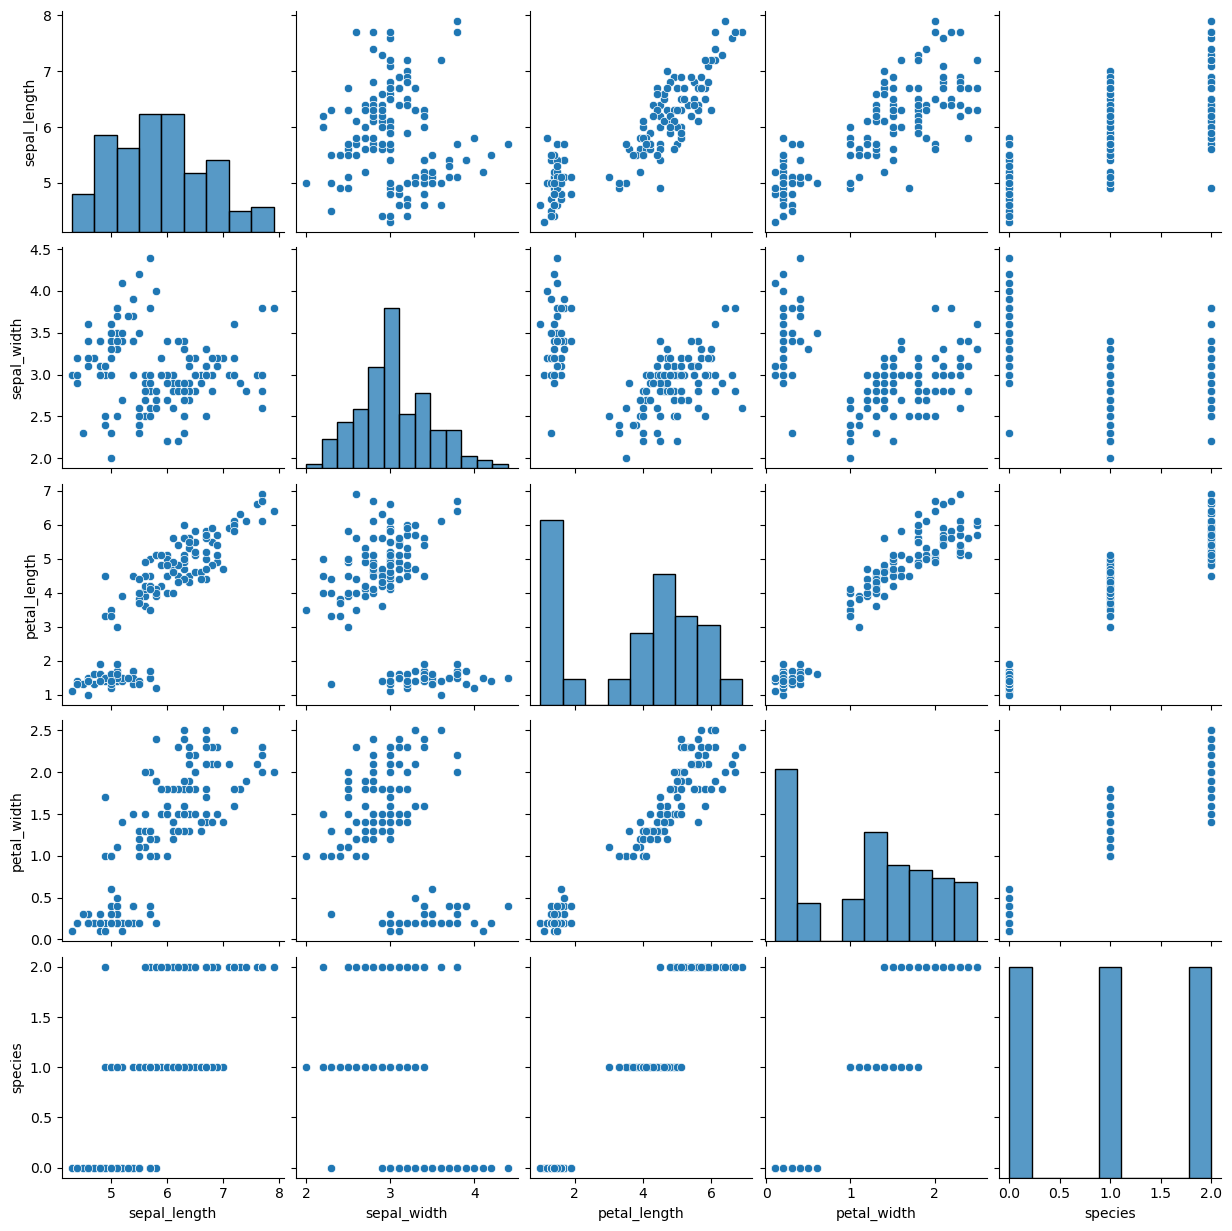

In [10]:
sns.pairplot(df)

<Axes: >

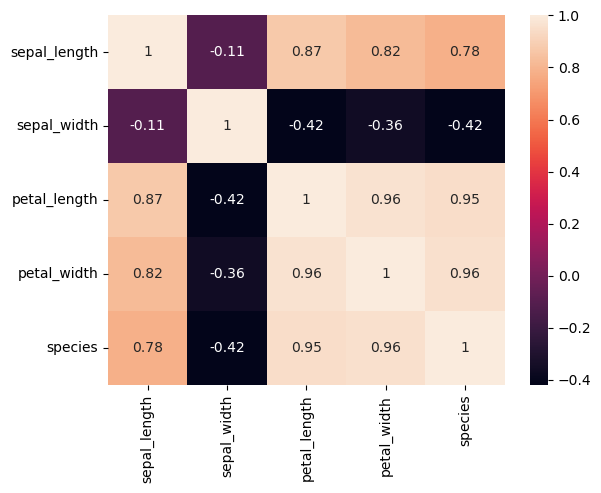

In [11]:
sns.heatmap(df.corr(),annot=True)

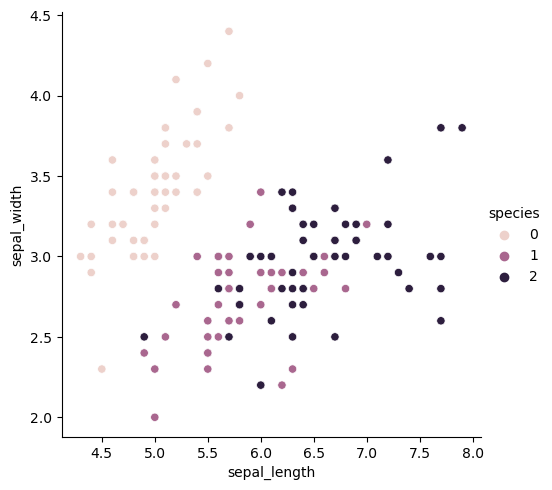

In [12]:
sns.relplot(x= 'sepal_length',y='sepal_width',hue = 'species',data = df)

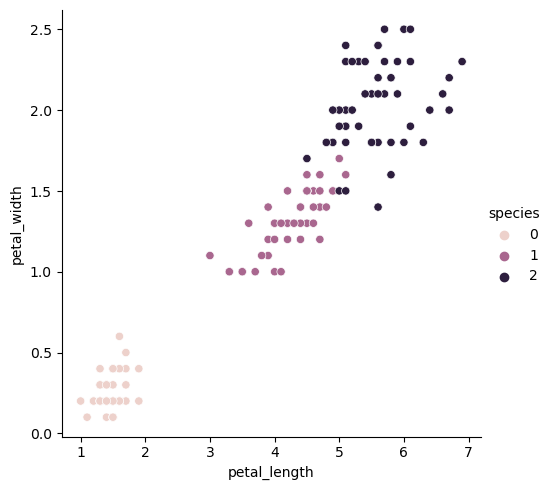

In [13]:
sns.relplot(x= 'petal_length',y='petal_width',hue = 'species',data = df)

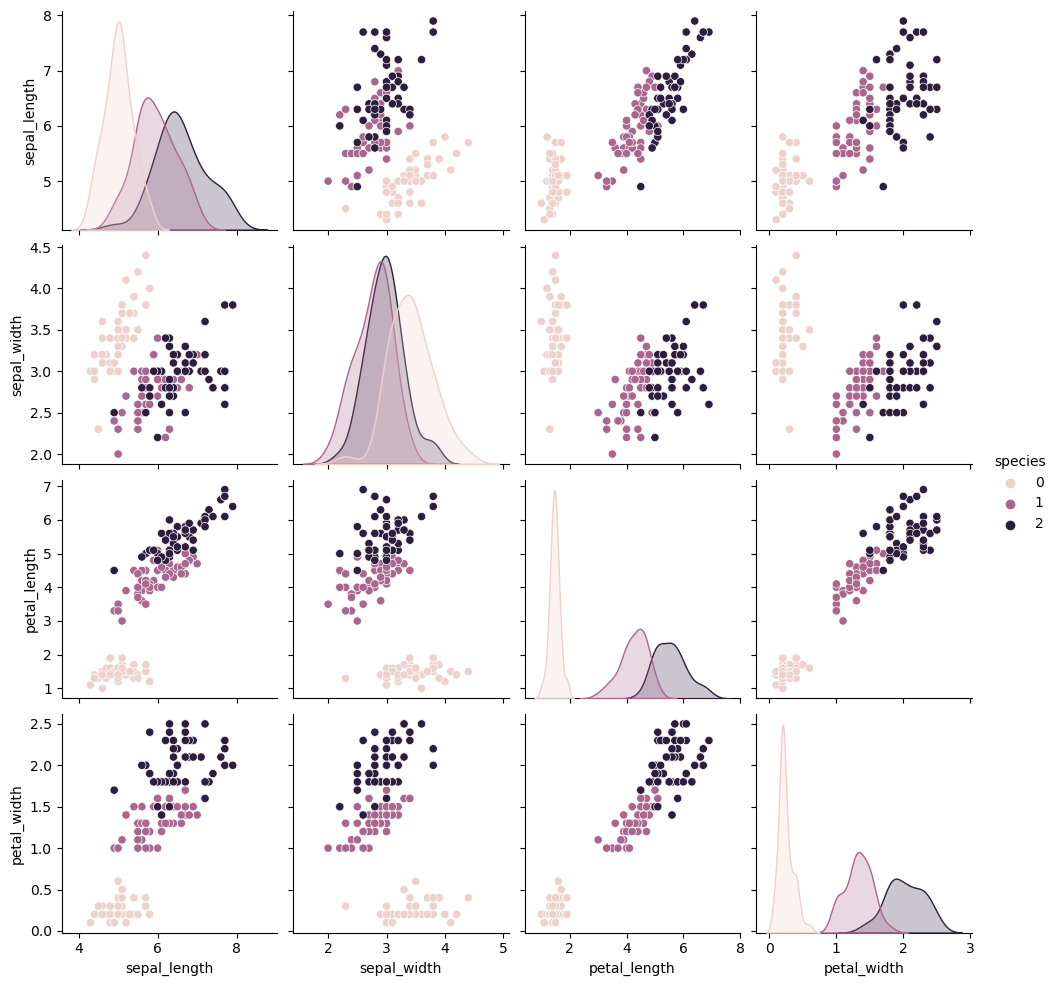

In [14]:
sns.pairplot(df,hue='species')

## 3. Feature Selection

#### selecting most relevant feature for the model that may improve the prediction performance

In [15]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']

## 4. Split Data

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()


In [23]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

1.0

#### woah! 100% accuracy

In [27]:
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [28]:
import warnings
warnings.filterwarnings('ignore')

result = classifier.predict([[1,2,5,2]])
if (result==0):
    print('Iris-setosa')
elif( result==1):
    print('Iris-versicolor')
else:
    print('Iris-virginica')

Iris-virginica


In [29]:
import warnings
warnings.filterwarnings('ignore')

result = classifier.predict([[1,2,2,2]])
if (result==0):
    print('Iris-setosa')
elif( result==1):
    print('Iris-versicolor')
else:
    print('Iris-virginica')

Iris-setosa


In [30]:
import warnings
warnings.filterwarnings('ignore')

result = classifier.predict([[3,2,5,2]])
if (result==0):
    print('Iris-setosa')
elif( result==1):
    print('Iris-versicolor')
else:
    print('Iris-virginica')

Iris-virginica
